**Pronóstico de relaciones: Un estudio predictivo del Éxito o Fracaso de las parejas a través de preguntas claves**
 -----------------------------------------------------------------------------------------------------------------

En nuestra sociedad,  caracterizada por la velocidad del cambio y la multiplicidad de opciones, vemos que cada vez es mas frecuente el fracaso de las relaciones de pareja. Una falta de conocimiento sobre lo que realmente sostiene y fortalace estas relaciones, hace que muchas parejas acaben separadas en pocos años.

Los datos que se van a analizar corresponden a un estudio que se realizó sobre 170 participantes. El estudio pretende obtener los indicadores claves de que una pareja siga casada o se divorcie. Se buscaran las preguntas que son mas significativas para predecir un divorcio. Se seleccionará también el mejor modelo de predicción para saber si una pareja tendrá exito o fracaso en su relación.


Se puede encontrar la base de datos en el siguiente enlace:

https://www.kaggle.com/datasets/zikazika/divorce-dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:\\Users\\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\11-TRABAJO FINAL\\Proyecto\\Proyecto final\\divorce.csv',delimiter=";")
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


Para una mejor comprensión de los datos voy a renombrar las columnas.

In [4]:
df=df.rename(columns={'Atr40':'discusion_pq', 'Atr17':'felicidad', 'Atr19':'roles','Atr18':'matrimonio','Atr11':'armonía','Atr9':'gusta_viajar',
'Atr20':'confianza', 'Atr15':'sueños_similares','Atr39': 'discusion_repentina', 'Atr41':'nervioso', 
'Atr5':'tiempo_especial', 'Atr29':'nos_conocemos', 'Atr36':'humillación', 'Atr16': 'amor','Atr38':'temas_odio','Atr17':'felicidad' })
df=df.rename(columns={'Atr1':'disculpa_y_final', 'Atr2':'ignorar_dif', 'Atr3':'empezar_nuevo','Atr4':'contactar','Atr6':'no_tp_hogar','Atr7':'estraños',
'Atr8':'disfrutar_vacac', 'Atr10':'sobjetivos_comunes','Atr12': 'valores_libertad', 'Atr13':'diversion', 
'Atr14':'objetivos_personas', 'Atr21':'gustos', 'Atr22':'cuidado_enfermo', 'Atr23':'comida_favorita','Atr24':'estres','Atr25':'mundo_interior',
'Atr26':'ansiedad', 'Atr27':'estres_actual','Atr28': 'deseo_esperanza', 'Atr30':'conozco_amigos', 
'Atr31':'agresivo_discusion', 'Atr32':'siempre_nunca', 'Atr33':'personalidad_neg', 'Atr34': 'expresion_ofensiva','Atr35':'insultos','Atr37':'sin_tranquilidad',
'Atr42':'discuto_mevoy', 'Atr43':'silencio_para_calmar','Atr44': 'bueno_salir_casa', 'Atr45':'callo_no_discuto', 
'Atr46':'silencio_para_dañar', 'Atr47':'silencio_miedo_ira', 'Atr48':'estoy bien', 'Atr49': 'inocente','Atr50':'no_culpable','Atr51':'no_me_equivoco',
'Atr52':'digo_es_inadecuado', 'Atr53':'recuerdo_inadecuado', 'Atr54':'incompetente'})

OBSERVACIÓN DE LOS DATOS

* Hay 54 cuestiones y 170 participantes.
* La columna 55 'Class' nos da la información: 0 casado, 1 divorciado
* Las respuestas van del 0 al 4, donde 0 es la respuesta mas baja y 4 la mas alta
* Las puntuaciones de las parejas divorciadas son mas altas que la de las casadas

Preguntas que se realizan:

*1.Si uno de nosotros se disculpa cuando nuestra discusión se deteriora, la discusión termina.

*2.Sé que podemos ignorar nuestras diferencias, aunque a veces las cosas se pongan difíciles.

*3.Cuando lo necesitamos, podemos retomar nuestras discusiones con mi cónyuge desde el principio y corregirlas.

*4.Cuando discuto con mi cónyuge, contactar con él acaba funcionando.

*5.El tiempo que paso con mi esposa es especial para nosotros.

*6.No tenemos tiempo en casa como compañeros.

*7.Somos como dos extraños que comparten el mismo entorno en casa en lugar de familia.

*8.Disfruto de las vacaciones con mi mujer.

*9.Disfruto viajando con mi mujer.

*10.La mayoría de nuestros objetivos son comunes con mi mujer.

*11.Creo que un día en el futuro, cuando mire atrás, veré que mi cónyuge y yo hemos estado ambos en armonía.

*12.Mi cónyuge y yo tenemos valores similares en cuanto a la libertad personal.

*13.Mi cónyuge y yo tenemos un sentido similar del entretenimiento.

*14.La mayoría de nuestros objetivos para las personas (hijos, amigos, etc.) son los mismos.

*15.Nuestros sueños con mi cónyuge son similares y armoniosos.

*16.Somos compatibles con mi cónyuge sobre lo que debe ser el amor.

*17.Compartimos los mismos puntos de vista sobre ser felices en nuestra vida con mi cónyuge.

*18.Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio.

*19.Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio,

*20.Mi cónyuge y yo tenemos valores similares en la confianza.

*21.Sé exactamente lo que le gusta a mi cónyuge.

*22.Sé cómo quiere mi cónyuge que la cuiden cuando está enferma.

*23.Conozco la comida favorita de mi cónyuge.

*24.Puedo decirle a qué tipo de estrés se enfrenta mi cónyuge en su vida.

*25.Conozco el mundo interior de mi cónyuge.

*26.Conozco las ansiedades básicas de mi cónyuge.

*27.Sé cuáles son las fuentes actuales de estrés de mi cónyuge.

*28.Conozco los deseos y esperanzas de mi cónyuge.

*29.Conozco muy bien a mi cónyuge.

*30.Conozco a los amigos de mi cónyuge y sus relaciones sociales.

*31.Me siento agresivo cuando discuto con mi cónyuge.

*32.Cuando discuto con mi cónyuge, suelo utilizar expresiones como "tú siempre" o "tú nunca" .

*33.Puedo utilizar expresiones negativas sobre la personalidad de mi cónyuge durante nuestras discusiones.

*34.Puedo utilizar expresiones ofensivas durante nuestras discusiones.

*35.Puedo insultar a mi cónyuge durante nuestras discusiones.

*36.Puedo ser humillante durante nuestras discusiones.

*37.Las discusiones con mi cónyuge no son tranquilas.

*38.Odio la forma que tiene mi cónyuge de abrir un tema.

*39.Nuestras discusiones suelen ocurrir de repente.

*40.Empezamos una discusión antes de que yo sepa lo que está pasando.

*41.Cuando hablo con mi cónyuge de algo, mi calma se rompe de repente.

*42.Cuando discuto con mi esposo, ı nicamente salgo y no digo una palabra.

*43.Casi siempre permanezco en silencio para calmar un poco el ambiente.

*44.A veces pienso que me viene bien salir de casa un rato.

*45.Prefiero quedarme en silencio que discutir con mi cónyuge.

*46.Aunque tenga razón en la discusión, guardo silencio para herir a mi cónyuge.

*47.Cuando discuto con mi cónyuge, guardo silencio porque temo no poder controlar mi ira.
*48.Me siento bien en nuestras discusiones.

*49.No tengo nada que ver con lo que se me acusa.

*50.En realidad no soy yo el culpable de lo que se me acusa.

*51.No soy yo quien se equivoca sobre los problemas en casa.

*52.No dudo en hablar a mi cónyuge de su insuficiencia.

*53.Cuando discuto, le recuerdo a mi cónyuge lo inadecuado que es.

*54.No tengo miedo de hablar a mi cónyuge de su incompetencia.

*55.Casado Si/No

In [5]:
df.shape

(170, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   disculpa_y_final      170 non-null    int64
 1   ignorar_dif           170 non-null    int64
 2   empezar_nuevo         170 non-null    int64
 3   contactar             170 non-null    int64
 4   tiempo_especial       170 non-null    int64
 5   no_tp_hogar           170 non-null    int64
 6   estraños              170 non-null    int64
 7   disfrutar_vacac       170 non-null    int64
 8   gusta_viajar          170 non-null    int64
 9   sobjetivos_comunes    170 non-null    int64
 10  armonía               170 non-null    int64
 11  valores_libertad      170 non-null    int64
 12  diversion             170 non-null    int64
 13  objetivos_personas    170 non-null    int64
 14  sueños_similares      170 non-null    int64
 15  amor                  170 non-null    int64
 16  felicida

todos los valores son numericos

In [7]:
df.isnull().sum()

disculpa_y_final        0
ignorar_dif             0
empezar_nuevo           0
contactar               0
tiempo_especial         0
no_tp_hogar             0
estraños                0
disfrutar_vacac         0
gusta_viajar            0
sobjetivos_comunes      0
armonía                 0
valores_libertad        0
diversion               0
objetivos_personas      0
sueños_similares        0
amor                    0
felicidad               0
matrimonio              0
roles                   0
confianza               0
gustos                  0
cuidado_enfermo         0
comida_favorita         0
estres                  0
mundo_interior          0
ansiedad                0
estres_actual           0
deseo_esperanza         0
nos_conocemos           0
conozco_amigos          0
agresivo_discusion      0
siempre_nunca           0
personalidad_neg        0
expresion_ofensiva      0
insultos                0
humillación             0
sin_tranquilidad        0
temas_odio              0
discusion_re

no faltan valores

In [8]:
df.describe()

,disculpa_y_final,ignorar_dif,empezar_nuevo,contactar,tiempo_especial,no_tp_hogar,estraños,disfrutar_vacac,gusta_viajar,sobjetivos_comunes,...,silencio_para_dañar,silencio_miedo_ira,estoy bien,inocente,no_culpable,no_me_equivoco,digo_es_inadecuado,recuerdo_inadecuado,incompetente,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


la distribución de los valores parece bastante normal

In [9]:
dfunico=df['Class'].unique()
print(dfunico)
print('0=casado, 1=divorciado')

[1 0]
0=casado, 1=divorciado


La columna 'Class' nos dan un resultado de casado o divorciado

In [10]:
df['Class'].value_counts()


Class
0    86
1    84
Name: count, dtype: int64

tenemos una buena nuestra ya que la mitad de los datos corresponden a personas casadas y la otra mitad a personas divorciadas

ANALISIS DE LA BASE DE DATOS

Hago un test de normalidad, el de Shapiro-Wilk, para ver si el conjunto de datos tiene una distribución normal

In [11]:
from scipy.stats import shapiro


for column in df.columns:
   
    data = df[column]
    statistic, p_value = shapiro(data)

 
    print(f'Columna: {column}, Statistic: {statistic}, p-value: {p_value}')

    
    if p_value > 0.05:
        print("los datos parecen provenir de una distribución normal.")
    else:
        print("los datos NO parecen provenir de una distribución normal.")


Columna: disculpa_y_final, Statistic: 0.7939647436141968, p-value: 3.317090796917804e-14
los datos NO parecen provenir de una distribución normal.
Columna: ignorar_dif, Statistic: 0.8498779535293579, p-value: 6.3293727897706376e-12
los datos NO parecen provenir de una distribución normal.
Columna: empezar_nuevo, Statistic: 0.8555055260658264, p-value: 1.1522275321362851e-11
los datos NO parecen provenir de una distribución normal.
Columna: contactar, Statistic: 0.8112298250198364, p-value: 1.4909112085095128e-13
los datos NO parecen provenir de una distribución normal.
Columna: tiempo_especial, Statistic: 0.7618624567985535, p-value: 2.5316967760483783e-15
los datos NO parecen provenir de una distribución normal.
Columna: no_tp_hogar, Statistic: 0.7733042240142822, p-value: 6.146114263957513e-15
los datos NO parecen provenir de una distribución normal.
Columna: estraños, Statistic: 0.5910352468490601, p-value: 6.564436194091497e-20
los datos NO parecen provenir de una distribución norm

Podemos ver que la distribucion no es normal por lo que se deduce que la gente está respondiendo con los datos de  los extremos. Es decir tienden mas a escoger 0 y 4, que los numeros intermedios

VISUALIZACION DE LOS DATOS

Buscamos que variables tienen una mayor y menor correlación entre ellas.

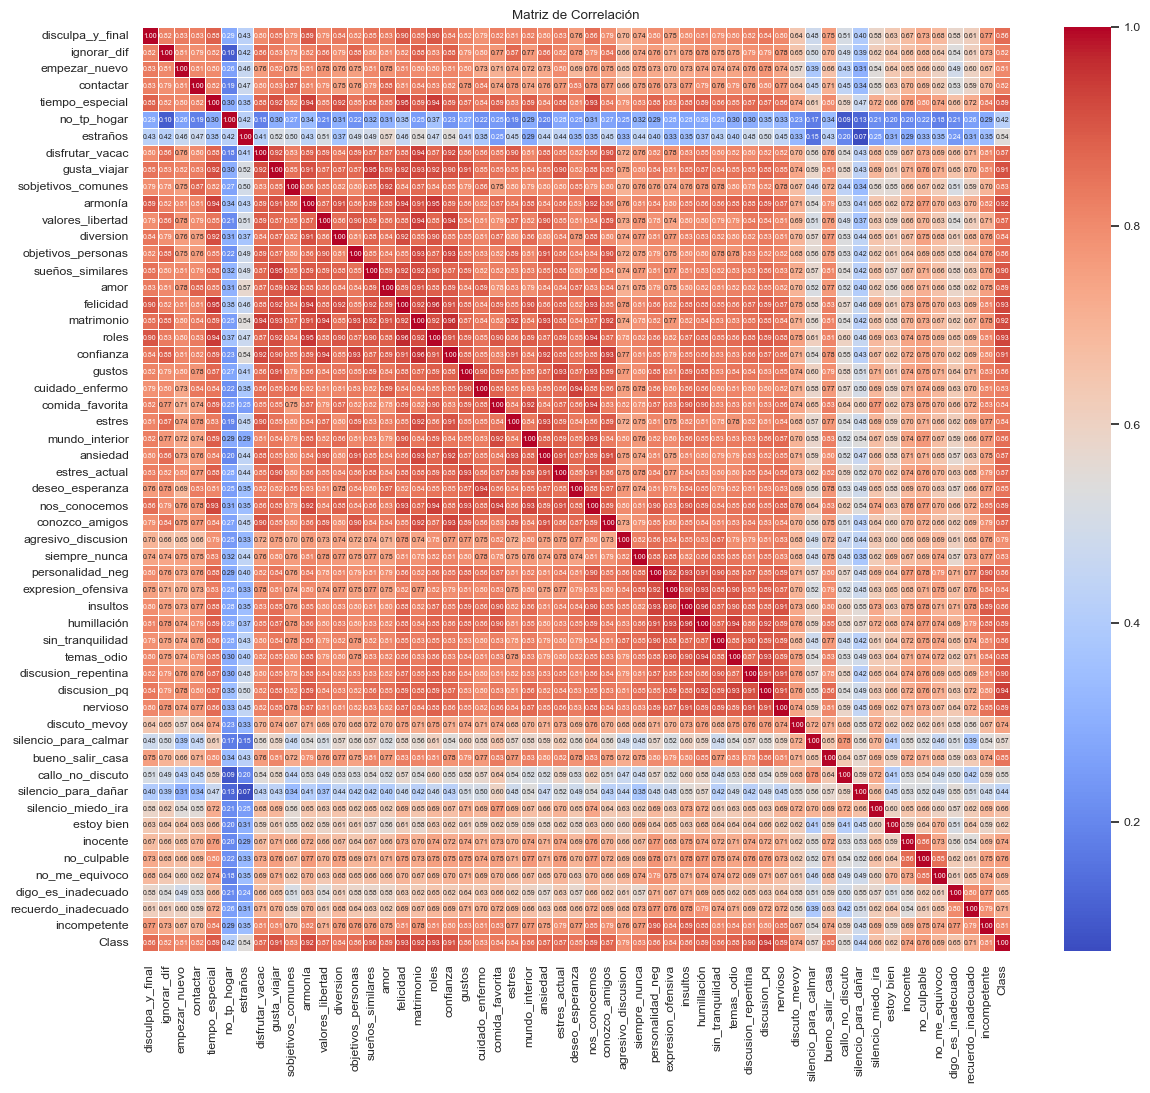

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

correlacion=df.corr()
plt.figure(figsize=(14, 12))
sns.set(font_scale=0.8)

# Creo un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 5})
plt.title("Matriz de Correlación")
plt.show()


Las variables con menos correlación corresponden a las que tienen un color mas blanco en la matriz.

Para mi modelo de predicción me interesan las correlaciones mas fuertes con la columna Class (Casado/Divorciado). voy a escoger las 15 mejores


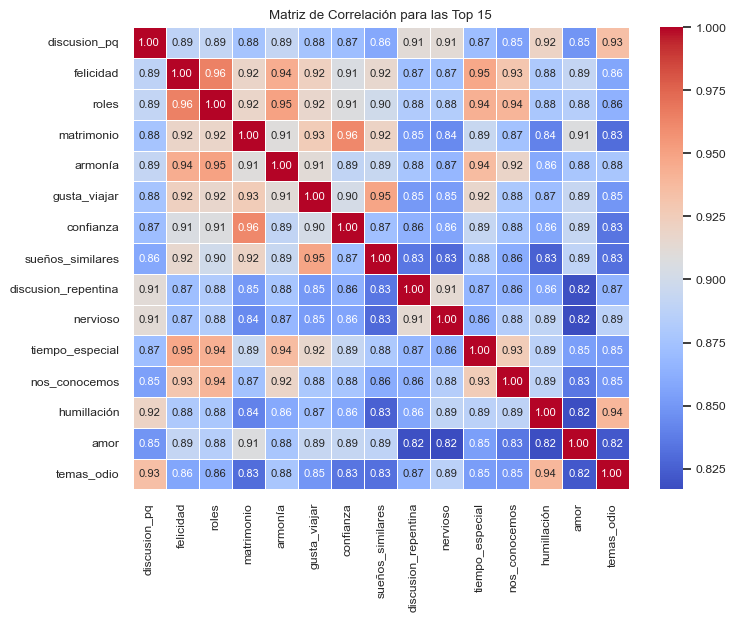

In [13]:
corr = df.corr()['Class'].drop('Class')
sort_corr=corr.abs().sort_values(ascending=False)[:15]

df_subset = df[sort_corr.index]
corr_matrix = df_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title("Matriz de Correlación para las Top 15")
plt.show()

Haciendo un grafico de barras podemos ver que preguntas tienen mas correlación con estar casado o divorciado

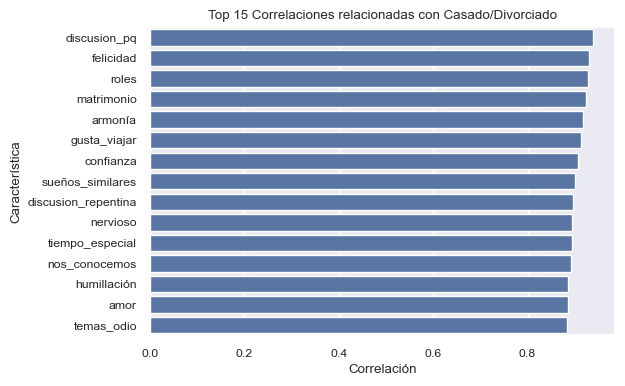

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_with_class = df.corr()['Class'].abs().sort_values(ascending=False)[1:16]


plt.figure(figsize=(6, 4))
sns.set(font_scale=0.8)


correlation_with_class = correlation_with_class.reset_index()


sns.barplot(x=correlation_with_class['Class'], y=correlation_with_class['index'])
plt.title('Top 15 Correlaciones relacionadas con Casado/Divorciado')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.show()

Las 6 preguntas con mas correlacion con estar casado o divorciado corresponden a las siguientes preguntas:

* 40. Empezamos una discusión antes de que yo sepa lo que está pasando.
* 17. Compartimos los mismos puntos de vista sobre ser felices en nuestra vida con mi cónyuge
* 19. Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio
* 18. Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio
* 11. Creo que un día en el futuro, cuando mire hacia atrás, veré que mi cónyuge y yo hemos estado en armonía el uno con el otro.
* 9. Disfruto viajando con mi mujer.


VOY A UTILIZAR VARIOS MODELOS PARA BUSCAR CUAL ME DA UNA PREDICCIÓN MEJOR

Lo primero que voy a hacer es entrenar el modelo con las variables en la x que mas correlacion tienen con el resultado

In [15]:
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


y=df['Class']
x= df[['discusion_pq', 'felicidad', 'roles', 'matrimonio', 'armonía', 'gusta_viajar', 'confianza', 'sueños_similares', 'discusion_repentina', 'nervioso', 'tiempo_especial', 'nos_conocemos', 'humillación', 'amor', 'temas_odio']]   

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40, shuffle=True)

voy a normalizar los datos antes de aplicar la regresion lineal. Ello nos ayudará a normalizar los resultados y reducir los valores extremos y por lo tanto, a mejorar el ajuste del modelo. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


*MODELO DE REGRESION LINEAL*. Como hemos visto anteriormente la distribución no es normal por lo que no será el mejor modelo de predicción. Al haber normalizado los datos espero obtener un mejor resultado

In [17]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train_normalized, y_train)

LinearRegression()

In [18]:
y_prediccion= modelo_lineal.predict (x_test_normalized)

Analizamos el rendimiento del modelo por r2 y mse y por validación cruzada

In [19]:
r2 = r2_score(y_test, y_prediccion)
mse = mean_squared_error(y_test, y_prediccion)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')

el r2 es: 0.860066837333849, es mas fiable si es cercano a 1
el mse es: 0.03496984072779628, es mejor si es  bajo


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_lineal, x_train_normalized, y_train, cv=5) 

print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", scores.mean())

Puntuaciones de validación cruzada: [0.79941882 0.95864897 0.86846643 0.96342652 0.94983453]
Precisión media: 0.9079590547876297


En promedio, el modelo de regresión lineal tienen una precisión del 90,80% en la validación cruzada, lo que nos dice que es un modelo con un buen rendimiento.

Aunque los datos no son lineales, despues de normalizarlos nos da una buena predicción.

*MODELO RANDOM FOREST*. Realizará varios arboles de decision durante el entrenamiento y combinará sus predicciones para obtener un resultado mas robusto y preciso. Es un buen modelo para trabajar con relaciones no lineales

Escojo los datos para entrenar el modelo

In [21]:
y1=df['Class']
x1 = df.drop('Class', axis=1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30,  random_state=40)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

parametrs = {'n_estimators': range(10, 50, 10), 
             'max_depth': range(1, 12, 2), 
             'min_samples_leaf': range(1, 7),
             'min_samples_split': range(2, 9, 2)}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1, verbose=1)
grid_search_cv_clf.fit(x1_train, y1_train)  
grid_search_cv_clf.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

los valores representan la mejor combinación de hiperparametros para el modelo de clasificaciión Random Forest Classifier utilizando la técnica de busqueda exhaustiva GridSearchCV. 

In [23]:
mejor_clf = grid_search_cv_clf.best_estimator_

mejor_clf.score(x1_test, y1_test)

0.9803921568627451

el modelo nos da una predicción del 98%

valoro el rendimiento del modelo con una matriz de confusion y por validación cruzada

<Axes: >

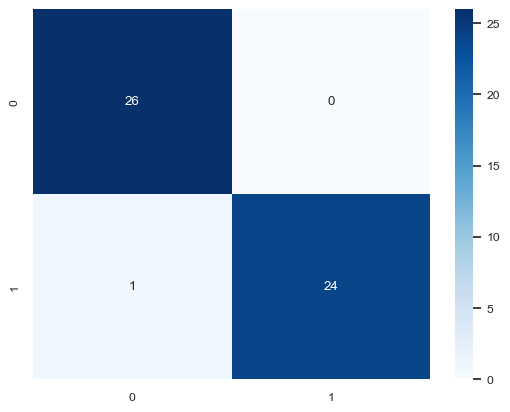

In [24]:
from sklearn.metrics import confusion_matrix
y_pred1 = mejor_clf.predict(x1_test)
sns.heatmap(confusion_matrix(y1_test, y_pred1), annot=True, cmap="Blues")

El modelo tiene un buen rendimiento, únicamente cometió un error al hacer las clasificaciones

In [25]:
#validacion cruzada
clf_rf = RandomForestClassifier(**grid_search_cv_clf.best_params_)

scores = cross_val_score(clf_rf, x1_train, y1_train, cv=5)

print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", scores.mean())

Puntuaciones de validación cruzada: [0.91666667 1.         0.95833333 1.         1.        ]
Precisión media: 0.975


En la validación cruzada, el modelo Random Forest tiene una precisión del 98,33%. Es un modelo con un buen rendimiento.

Para cada class (casado, divorciado), se van a calcular las metricas de precisión, recall y fl-score 

In [26]:
from sklearn.metrics import classification_report

mejor_clf.fit(x1_train, y1_train)

#predicciones en el conjunto de test
y_pred = mejor_clf.predict(x1_test)


reporte_clasificacion = classification_report(y1_test, y_pred)
print(reporte_clasificacion)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



El modelo de Random Forest tiene un buen rendimiento en la clasificación de ambas class, con precisiones, recalls y FI-scores elevados, así como una alta exactitud general

Las características según el modelo random forest mas importantes para el resultado son las siguientes:

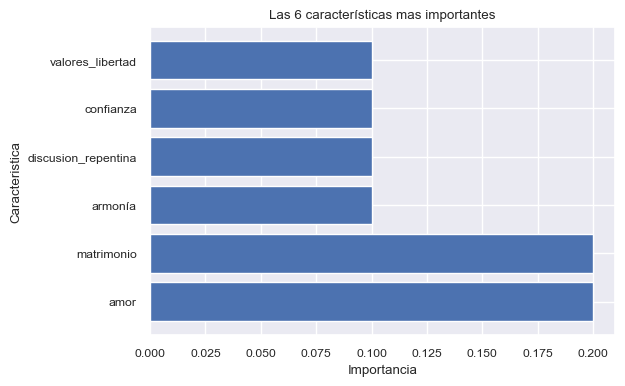

In [27]:

importancias_caracteristicas = mejor_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x1_train.columns, 'Importance': importancias_caracteristicas})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(6)

plt.figure(figsize=(6, 4))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.title('Las 6 características mas importantes')
plt.show()

corresponden a las siguientes preguntas:

* 40. Empezamos una discusión antes de que yo sepa lo que está pasando.
* 18. Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio.
*  5. El tiempo que paso con mi esposa es especial para nosotros.
*  1. Si uno de nosotros se disculpa cuando nuestra discusión se deteriora, la discusión termina.
* 29. Conozco muy bien a mi cónyuge.
*  2. Sé que podemos ignorar nuestras diferencias, aunque a veces las cosas se pongan difíciles.


*MODELO DE REGRESION LOGISTICA*. Es un buen modelo para mi base de datos ya que la variable dependiente es binaria: casado/divorciado

defino los datos de entrenamiento del modelo

In [28]:
y2=df['Class']
x2 = df.drop('Class', axis=1)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=40, shuffle=True)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

modelo_logistico = LogisticRegression(random_state=40)
modelo_logistico.fit(x2_train, y2_train)



LogisticRegression(random_state=40)

In [30]:
predicciones_logistic = modelo_logistico.predict(x2_test)
accuracy = accuracy_score(y2_test, predicciones_logistic)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9803921568627451


Para intentar mejorar la precision voy a hacer la tecnica del GridSeachCV

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='lbfgs'))
])


param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2']
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


grid_search.fit(x2_train, y2_train)


print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúo el rendimiento en el conjunto de prueba
accuracy = grid_search.score(x2_test, y2_test)
print(f'Precisión en el conjunto de prueba: {accuracy}')

Mejores hiperparámetros: {'logreg__C': 100, 'logreg__penalty': 'l2'}
Precisión en el conjunto de prueba: 0.9803921568627451


no se ha obtenido ninguna mejora

VOY A HACER UNA SELECCION DE CARACTERISTICAS PARA INTENTAR ENCONTRAR UNA MEJOR PREDICCION PARA EL MODELO DE REGRESION LOGISTICA.
El objetivo de eliminar caracteristicas, es seleccionar cada vez conjuntos mas pequeños de caracteristicas y obtener aquellas que son mas importantes, eliminando las que no lo son para el resultado.

escojo los datos para el entrenamiento

In [32]:
X3 = df.drop('Class', axis=1)
y3 = df['Class']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=40)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Utilizar RFE con LogisticRegression como estimador
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

# Ajustar RFE al conjunto de entrenamiento normalizado
rfe.fit(X3_train, y3_train)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.


Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

miramos la validez de la prediccion

In [34]:
from sklearn.metrics import roc_auc_score

#calculamos la precisión del test
acc = roc_auc_score(y3_test, rfe.predict(X3_test))
print(f"{acc:.1%} roc_auc_score on test set.") 

# calculamos la precisión del entrenamiento
acc = roc_auc_score(y3_train, rfe.predict(X3_train))
print(f"{acc:.1%} roc_auc_score on train set.") 

# calculamos la precisión del conjunto
acc = roc_auc_score(y3, rfe.predict(X3))
print(f"{acc:.1%} roc_auc_score on whole set.") 

98.0% roc_auc_score on test set.
100.0% roc_auc_score on train set.
99.4% roc_auc_score on whole set.


obtenemos un 99,4% del conjunto de efectividad, utilizando la regresion logistica con los valores de RFE

Analizo el rendimiento del modelo con la matriz de confusión y por validación cruzada

<Axes: >

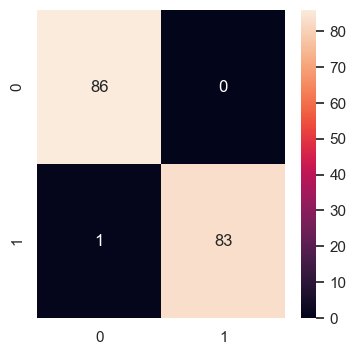

In [35]:
#modelo de matriz de confusión
from sklearn.metrics import confusion_matrix
ypred = rfe.predict(X3)
cm = confusion_matrix(y3,ypred) 
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(cm, annot=True)

tiene un buen rendimiento. Solo ha fallado en 1 caracteristica la predicción

In [36]:
# validación cruzada

scores = cross_val_score(rfe.estimator_, X3_train, y3_train, cv=5)

print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", scores.mean())

Puntuaciones de validación cruzada: [0.91666667 1.         0.95833333 1.         1.        ]
Precisión media: 0.975


La validación cruzada nos da una precisión media de 0,975% siendo este un buen modelo

Realizamos las metricas precisión, recall y fl-score para ver el rendimiento del modelo por Class


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Realizar predicciones en los datos de prueba
y_pred = rfe.predict(X3_test)

precision = precision_score(y3_test, y_pred)

recall = recall_score(y3_test, y_pred)

f1 = f1_score(y3_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 1.0
Recall: 0.96
F1-score: 0.9795918367346939


el modelo muestra un rendimiento muy alto con una precisión perfecta y un recall muy cercano a 1. Es capaz de identificar correctamente la mayoría de las muestras en el conjunto de datos

hago un ranking de las caracteristicas mas importantes para la predicción

In [38]:
data=dict(zip(df.columns, rfe.ranking_))
rfe_data= {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

n=1
for key, value in rfe_data.items():
    print(key, ' : ', value)
    if n==15:
        break
    n=n+1

objetivos_personas  :  1
matrimonio  :  1
roles  :  1
conozco_amigos  :  1
discusion_repentina  :  1
discusion_pq  :  1
inocente  :  2
disculpa_y_final  :  3
deseo_esperanza  :  4
digo_es_inadecuado  :  5
empezar_nuevo  :  6
ansiedad  :  7
armonía  :  8
nos_conocemos  :  9
siempre_nunca  :  10


Visualmene el ranking es el siguiente, donde 1 es la caracteristica mas importante y 5 la que menos.

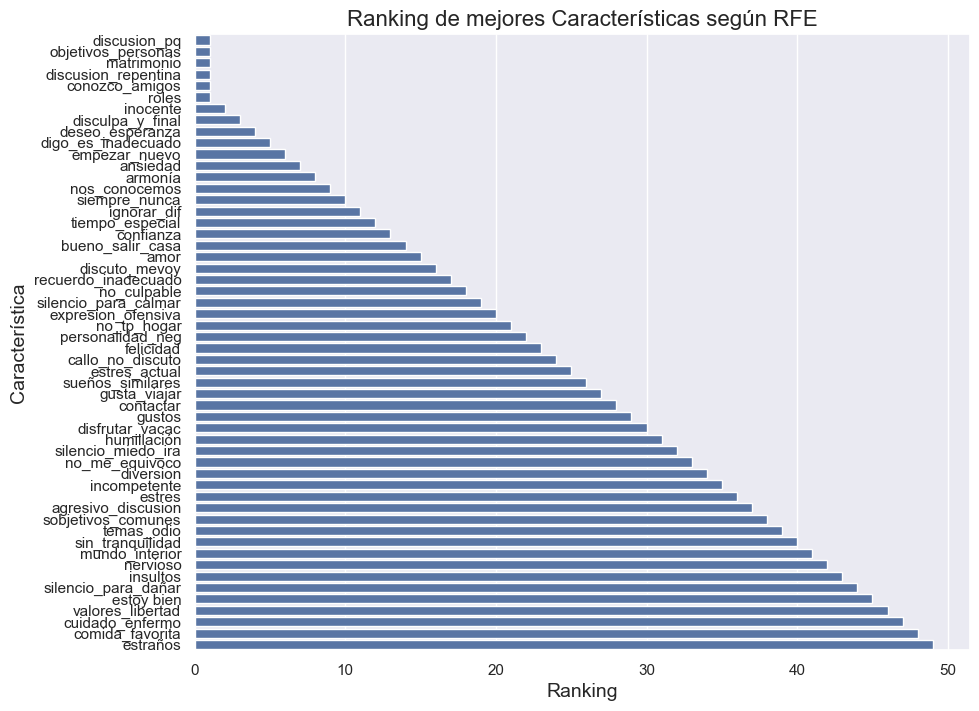

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


data = dict(zip(df.columns, rfe.ranking_))
rfe_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

df_rfe = pd.DataFrame(list(rfe_data.items()), columns=['Feature', 'Ranking'])

df_rfe = df_rfe.sort_values(by='Ranking')

plt.figure(figsize=(10, 8))

sns.barplot(x='Ranking', y='Feature', data=df_rfe)

plt.title('Ranking de mejores Características según RFE', fontsize=16)
plt.xlabel('Ranking', fontsize=14)
plt.ylabel('Característica', fontsize=14)

plt.show()

Las 6 preguntas que mas relacion tienen con la prediccion de la variable casado/divorciado son las siguientes:

* 40. Empezamos una discusión antes de que yo sepa lo que está pasando.
* 14. La mayoría de nuestros objetivos para con las personas (hijos, amigos, etc.) son los mismos.
* 18. Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio
* 39. Nuestras discusiones suelen ocurrir de repente.
* 30. Conozco a los amigos de mi cónyuge y sus relaciones sociales.
* 19. Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio


VAMOS A HACER UNA PREDICCION UTILIZANDO EL MODELO rfe.estimator CON NUEVOS DATOS

Se realizan las principales preguntas para predecir si la pareja continuará casada o se divorciará

In [40]:

selected_features = ['Empezamos una discusión antes de que yo sepa lo que está pasando',
                     'La mayoría de nuestros objetivos para con las personas (hijos, amigos, etc.) son los mismos',
                     'Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio',
                     'Nuestras discusiones suelen ocurrir de repente',
                     'Conozco a los amigos de mi cónyuge y sus relaciones sociales',
                     'Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio']

# solicito que se entren los valores
valores_caracteristicas = []
print("Ingresa los valores de las 6 características en una escala de 0 a 4, donde 0 significa 'no' y 4 significa 'sí':")
for feature in selected_features:
    valor = float(input(f"Ingrese el valor para '{feature}': "))
    valores_caracteristicas.append(valor)

# creo el DataFrame con los valores de las características
nuevos_datos2 = pd.DataFrame([valores_caracteristicas])

# Realizo la predicción utilizando el modelo RFE
prediccion = rfe.estimator_.predict(nuevos_datos2)


if prediccion[0] == 1:
    print("El modelo predice: Divorciado")
else:
    print("El modelo predice: Casado")

Ingresa los valores de las 6 características en una escala de 0 a 4, donde 0 significa 'no' y 4 significa 'sí':
El modelo predice: Divorciado


Aunque el modelo tiene una fiabilidad del 99,4% vemos que las predicciones no tienen mucho sentido. Voy a mirar algunas de las relaciónes que hay entre las 6 preguntas y las respuestas de los casados y divorciados.

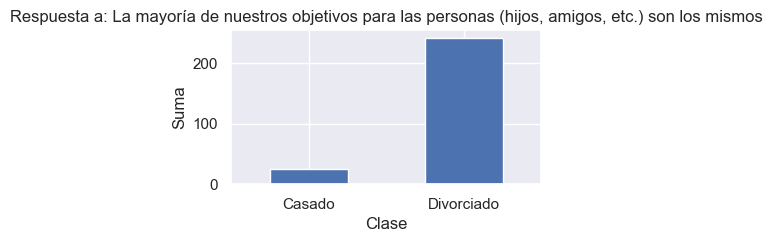

In [41]:
df_combined = pd.concat([X3, y3], axis=1)
class_mapping = {0: 'Casado', 1: 'Divorciado'}
df_combined['Class'] = df_combined['Class'].map(class_mapping)

sum_by_class = df_combined.groupby('Class')['objetivos_personas'].sum()

plt.figure(figsize=(4, 2))
sum_by_class.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Suma')
plt.title('Respuesta a: La mayoría de nuestros objetivos para las personas (hijos, amigos, etc.) son los mismos')
plt.xticks(rotation=0)
plt.show()

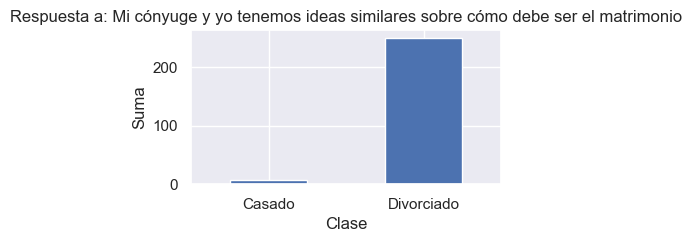

In [42]:
sum_by_class = df_combined.groupby('Class')['matrimonio'].sum()

plt.figure(figsize=(4, 2))
sum_by_class.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Suma')
plt.title('Respuesta a: Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio')
plt.xticks(rotation=0)
plt.show()

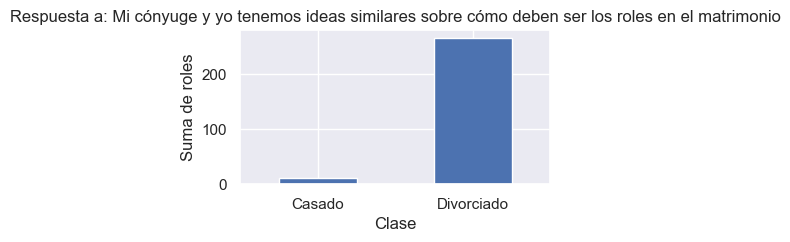

In [43]:
sum_by_class = df_combined.groupby('Class')['roles'].sum()

plt.figure(figsize=(4, 2))
sum_by_class.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Suma de roles')
plt.title('Respuesta a: Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio')
plt.xticks(rotation=0)
plt.show()

vemos que es muy extraño que, precisamente los divorciados, den valoraciones mas altas a preguntas que son positivas para la relación en pareja y los casados den unos valores tan bajos. 

Resumen y Conclusiones:

* Los datos no tienen una distribución normal. Los participantes han respondido bastante los valores extremos, 0 y 4.
* Sí hay bastante correlación entre las preguntas y la variable casado/divorciado.
* Se realiza una regresion lineal con las mejores 15 correlaciones y nos da una precisión del 86% con un mse del 0,035.
* El modelo Random Forest con GridSearchCV nos da una precisión del 98%.
* El modelo de regresión logistica con seleccion de caracteristicas RFE nos da una precisión del 99,4%.
* Las preguntas mas significativas para la predicción en regresión logistica con RFE son las siguientes: 
    - 40. Empezamos una discusión antes de que yo sepa lo que está pasando.
    - 14. La mayoría de nuestros objetivos para con las personas (hijos, amigos, etc.) son los mismos.
    - 18. Mi cónyuge y yo tenemos ideas similares sobre cómo debe ser el matrimonio.
    - 39. Nuestras discusiones suelen ocurrir de repente.
    - 30. Conozco a los amigos de mi cónyuge y sus relaciones sociales.
    - 19. Mi cónyuge y yo tenemos ideas similares sobre cómo deben ser los roles en el matrimonio.
* Al hacer predicciones con valores nuevos se ven resultados extraños.
* Se analizan las respuestas entre casados y divorciados de las preguntas 14, 18 y 19 viendo que no son coherentes.
* Podemos concluir diciendo que, todo y tener un modelo con un 99,4% de precisión con las preguntas mas significativas para el resultado, la base de datos con el que se ha trabajado da unos resultados incoherentes. Sus predicciones no nos va a servir para predecir la probabilidad de éxito en el matrimoio, al menos en España.